In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
file = 'medical_students_dataset.csv'
df = pd.read_csv(file)
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [7]:
def dataset_diagnosis(df, missing_threshold=0.5, top_unique=5):
    print(f"Общая информация: {len(df)} строк, {len(df.columns)} колонок")

    # Пропущенные значения
    missing = df.isnull().sum()
    print(f'Пропущенные значения: {missing}')

    # Дубликаты
    duplicates = df.duplicated().sum()
    print(f"Полных дубликатов: {duplicates} ({duplicates/len(df):.1%})")

    # Базовая статистика для числовых колонок
    numeric_cols = df.select_dtypes(include='number').columns
    if not numeric_cols.empty:
        print("\nБазовая статистика для числовых колонок:")
        print(df[numeric_cols].describe().round(2))

dataset_diagnosis(df)

Общая информация: 200000 строк, 13 колонок
Пропущенные значения: Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Полных дубликатов: 7644 (3.8%)

Базовая статистика для числовых колонок:
       Student ID        Age     Height     Weight        BMI  Temperature  \
count   180000.00  180000.00  180000.00  180000.00  180000.00    180000.00   
mean     49974.04      26.02     174.95      69.97      23.34        98.60   
std      28879.64       4.89      14.45      17.32       7.03         0.50   
min          1.00      18.00     150.00      40.00      10.07        96.40   
25%      24971.75      22.00     162.48      54.97      17.86        98.26   
50%      49943.50      26.00     174.90      69.98      22.67        

In [240]:
from sklearn.preprocessing import OrdinalEncoder
# Кодидирование типа объект
encoder = OrdinalEncoder()
df[['Gender', 'Blood Type', 'Diabetes', 'Smoking']] = encoder.fit_transform(df[['Gender', 'Blood Type', 'Diabetes', 'Smoking']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  float64
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  float64
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  float64
 12  Smoking         180000 non-null  float64
dtypes: float64(13)
memory usage: 19.8 MB


In [241]:
#Удаление дубликатов и пропущенных значений
data = df.drop_duplicates()

Замена колонок для задачи. Все преобразования основаны на исходных данных, поэтому связи между признаками не теряются.

In [242]:
# Замена пропущенных значений
cols = data.select_dtypes(include=[np.number]).columns.tolist()
for col in cols:
    data.loc[:, col] = data[col].fillna(data[col].mean())

In [243]:
data['Height'] = data['Height'].round()
data['Направление'] = pd.Categorical(data['Height']).codes + 1
data['Направление'].value_counts()

C:\Users\1645295\AppData\Local\Temp\ipykernel_23220\3228625772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Height'] = data['Height'].round()
C:\Users\1645295\AppData\Local\Temp\ipykernel_23220\3228625772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Направление'] = pd.Categorical(data['Height']).codes + 1


Направление
26    23494
2      3600
45     3594
46     3568
20     3566
28     3560
16     3549
3      3548
38     3536
22     3532
7      3515
6      3508
41     3502
10     3496
36     3494
24     3484
14     3484
17     3481
23     3477
48     3469
44     3460
49     3453
33     3449
25     3444
35     3437
15     3437
8      3427
37     3417
40     3416
12     3413
34     3406
30     3400
9      3399
39     3399
47     3395
18     3394
4      3391
27     3389
11     3376
19     3370
5      3369
42     3364
21     3364
32     3364
13     3356
29     3343
43     3337
31     3307
50     3278
51     1773
1      1772
Name: count, dtype: int64

In [244]:
data['Баллы ЕГЭ'] = data['Cholesterol']
data['Возраст'] = data['Age']
data['Пол'] = data['Gender']
data['Волонтерство'] = data['Diabetes']
data['Вступительный балл'] = data['Weight']
data['Квота'] = data['Smoking']
data['Регион рождения'] = data['Weight']
data['Уровень безработицы'] = data['BMI']

C:\Users\1645295\AppData\Local\Temp\ipykernel_23220\3769734931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Баллы ЕГЭ'] = data['Cholesterol']
C:\Users\1645295\AppData\Local\Temp\ipykernel_23220\3769734931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Возраст'] = data['Age']
C:\Users\1645295\AppData\Local\Temp\ipykernel_23220\3769734931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [245]:
grouped = data.groupby('Направление')

desired_samples = 3600

# Cбалансированный DataFrame
data = pd.DataFrame()
for direction, group in grouped:
    if direction == 26:  # Доминирующий класс
        # Уменьшение доминирующего класса до желаемого количества
        sampled_group = group.sample(n=desired_samples, random_state=42)
    else:
        # Берем все записи для редких классов или до желаемого количества
        sampled_group = group.sample(n=min(len(group), desired_samples), random_state=42, replace=False)
    
    data = pd.concat([data, sampled_group])

# Проверка результата
print(data['Направление'].value_counts())

Направление
26    3600
2     3600
45    3594
46    3568
20    3566
28    3560
16    3549
3     3548
38    3536
22    3532
7     3515
6     3508
41    3502
10    3496
36    3494
14    3484
24    3484
17    3481
23    3477
48    3469
44    3460
49    3453
33    3449
25    3444
15    3437
35    3437
8     3427
37    3417
40    3416
12    3413
34    3406
30    3400
9     3399
39    3399
47    3395
18    3394
4     3391
27    3389
11    3376
19    3370
5     3369
21    3364
42    3364
32    3364
13    3356
29    3343
43    3337
31    3307
50    3278
51    1773
1     1772
Name: count, dtype: int64


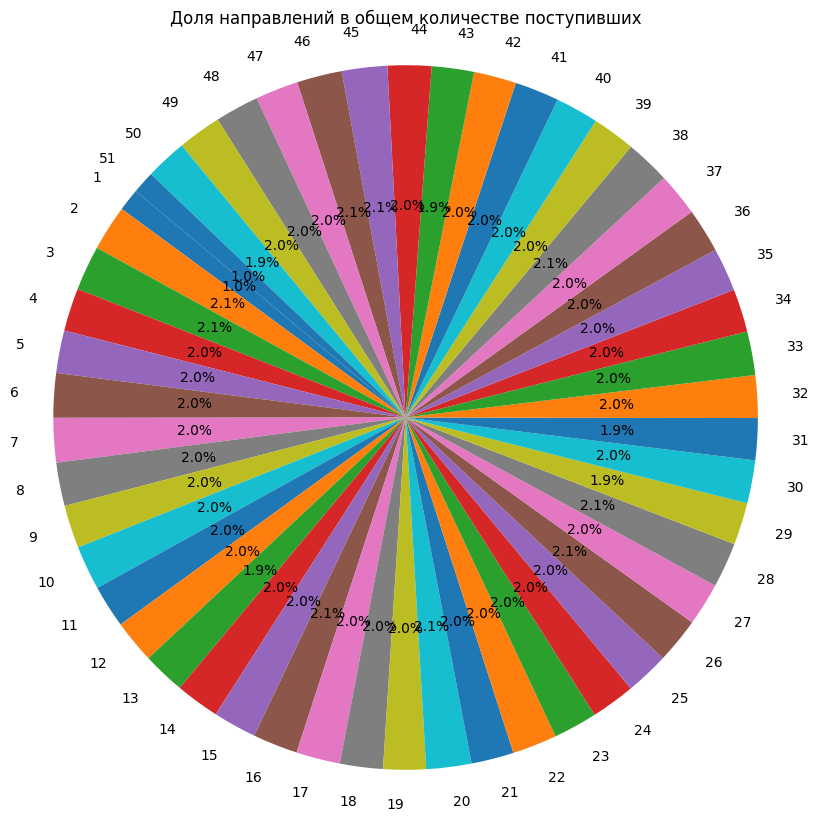

In [120]:
grouped_data = data.groupby('Направление').size().reset_index(name='Количество поступивших')
# Визуализация данных
plt.figure(figsize=(10, 10))
plt.pie(grouped_data['Количество поступивших'], labels=grouped_data['Направление'], autopct='%1.1f%%', startangle=140)
plt.title('Доля направлений в общем количестве поступивших')
plt.axis('equal')
plt.show()

In [253]:
# Подсчет количества записей по направлениям
counts = data['Направление'].value_counts().reset_index()
counts.columns = ['Направление', 'Количество поступивших']

# Параметры временного ряда
start_year = 1908
end_year = 2024
years = list(range(start_year, end_year + 1))
num_years = len(years)

# Классификация направлений по группам роста
directions = counts['Направление'].tolist()
growth_rates = {}

for i, direction in enumerate(directions):
    if i < 15:
        growth_rates[direction] = 1.02  # Первые 15 направлений (+2%)
    elif 15 <= i < 30:
        growth_rates[direction] = 1.01  # Следующие 15 направлений (+1%)
    else:
        growth_rates[direction] = 1.005  # Остальные (+0,5%)

# Распределение записей по годам с учетом прироста
yearly_distribution = {}

for direction in directions:
    # Общее количество записей для направления
    total_records = counts.loc[
        counts['Направление'] == direction, 
        'Количество поступивших'
    ].values[0]
    
    # Рассчет распределения по годам
    distribution = []
    rate = growth_rates[direction]
    
    for year_idx in range(num_years):
        # Вес для текущего года (учитывается прирост)
        weight = rate ** year_idx
        distribution.append(weight)
    
    # Нормализация веса, чтобы их сумма была равна 1
    distribution = np.array(distribution) / np.sum(distribution)
    
    # Рассчет количества записей для каждого года
    yearly_counts = (total_records * distribution).round().astype(int)
    
    # Корректировка общего количества записей (из-за округления)
    while yearly_counts.sum() != total_records:
        diff = total_records - yearly_counts.sum()
        yearly_counts[np.argmax(yearly_counts)] += diff
    
    yearly_distribution[direction] = yearly_counts

# Добавление год поступления в исходный DataFrame
data['Год поступления'] = 0  # Инициализируем колонку

# Распределение записей по годам
for direction in directions:
    # Фильтрация записей для текущего направления
    mask = data['Направление'] == direction
    direction_data = data[mask].copy()
    
    # Распределение по годам
    counts = yearly_distribution[direction]
    
    # Создание списка годов для каждой записи
    years_list = []
    for year, count in zip(years, counts):
        years_list.extend([year] * count)
    
    # Присваивание
    data.loc[mask, 'Год поступления'] = years_list[:sum(mask)]

# Проверка результата
data[['Направление', 'Год поступления']]


,Направление,Год поступления
130295,1,1908
128773,1,1908
84782,1,1908
184664,1,1908
125291,1,1908
...,...,...
127927,51,2024
146222,51,2024
94884,51,2024
164550,51,2024


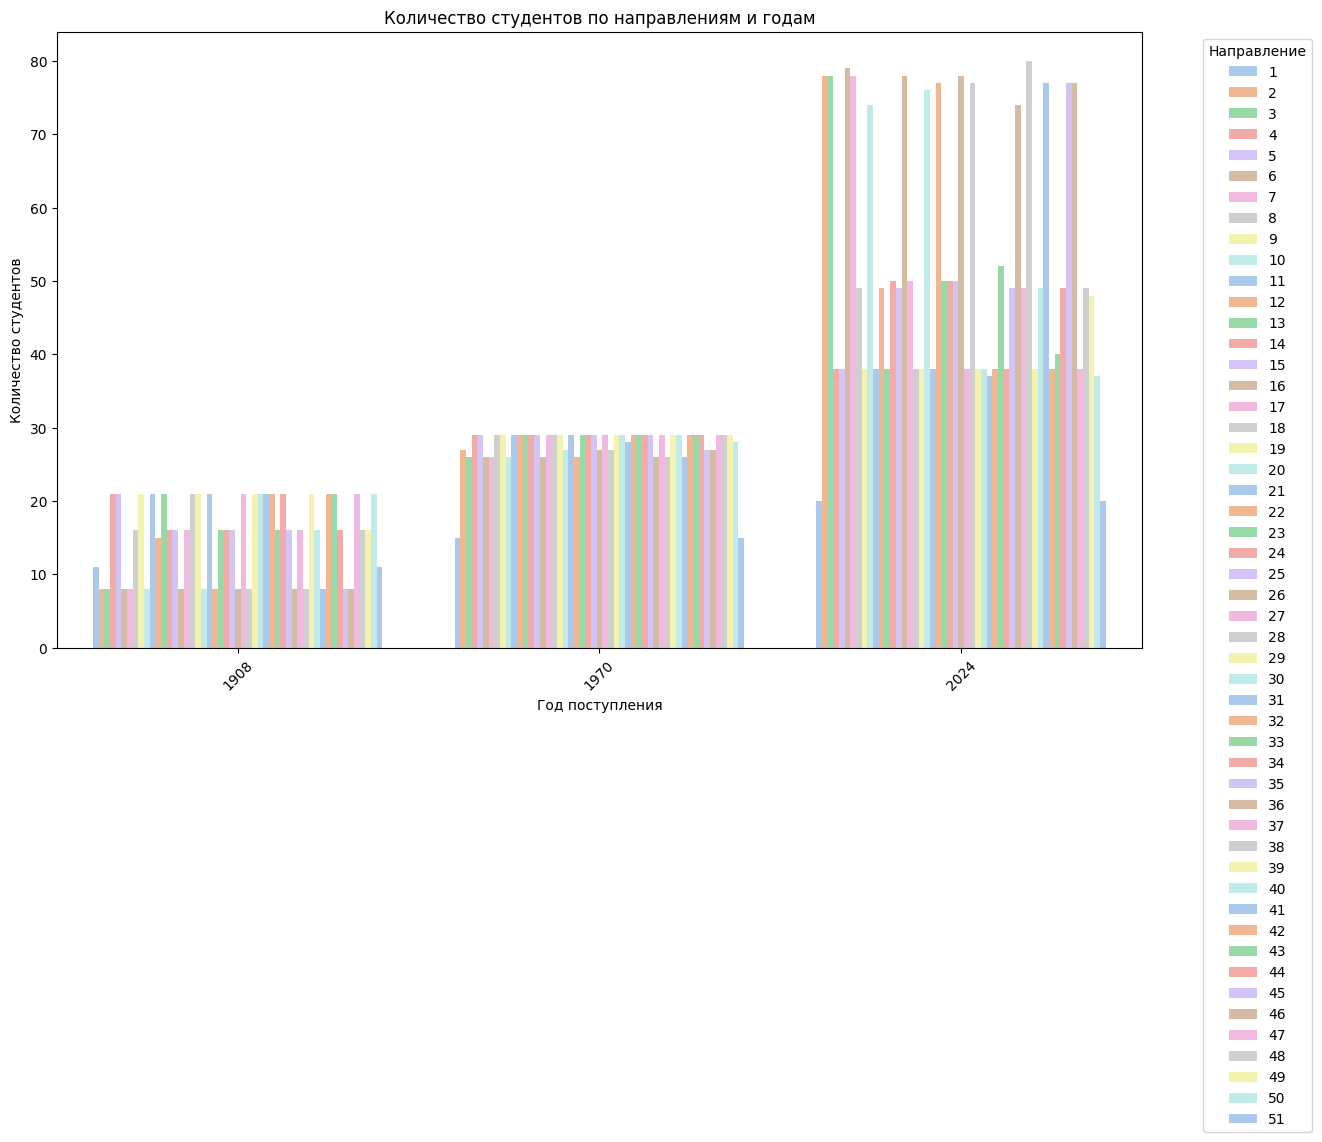

In [254]:
count_df = data.groupby(['Год поступления', 'Направление']).size().reset_index(name='Количество')
# Фильтрация для нужных годов
years = [1908, 1970, 2024]
count_df_filtered = count_df[count_df['Год поступления'].isin(years)]

# Визуализация результатов
plt.figure(figsize=(14, 8))
sns.barplot(x='Год поступления', y='Количество', hue='Направление', data=count_df_filtered, palette='pastel')
plt.title('Количество студентов по направлениям и годам')
plt.xlabel('Год поступления')
plt.ylabel('Количество студентов')
plt.legend(title='Направление', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Поворот меток на оси X для удобства чтения
plt.show()

In [255]:
data.describe()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,...,Направление,Баллы ЕГЭ,Возраст,Пол,Волонтерство,Вступительный балл,Квота,Регион рождения,Уровень безработицы,Год поступления
count,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,...,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000
mean,49935.152674,26.021795,0.499029,174.958084,69.979878,1.512027,23.348610,98.600682,79.511470,114.534116,...,25.958084,184.503979,26.021795,0.499029,0.100274,69.979878,0.200138,69.979878,23.348610,1977.957057
std,27327.923945,4.628625,0.473223,14.455987,16.399224,1.057707,6.681502,0.473673,10.928609,13.629767,...,14.455987,35.575208,4.628625,0.473223,0.284263,16.399224,0.378805,16.399224,6.681502,32.767068
min,1.000000,18.000000,0.000000,150.000000,40.000578,0.000000,10.074837,96.397835,60.000000,90.000000,...,1.000000,120.000000,18.000000,0.000000,0.000000,40.000578,0.000000,40.000578,10.074837,1908.000000
25%,27825.250000,22.000000,0.000000,162.000000,56.698158,1.000000,18.402530,98.307939,71.000000,104.000000,...,13.000000,156.000000,22.000000,0.000000,0.000000,56.698158,0.000000,56.698158,18.402530,1953.000000
50%,49981.974488,26.022254,0.499803,175.000000,69.980827,1.512225,23.338982,98.601117,79.508817,114.564761,...,26.000000,184.499765,26.022254,0.499803,0.000000,69.980827,0.000000,69.980827,23.338982,1984.000000
75%,72033.500000,30.000000,1.000000,187.000000,83.244849,2.000000,27.236898,98.894530,88.000000,126.000000,...,38.000000,213.000000,30.000000,1.000000,0.000000,83.244849,0.200395,83.244849,27.236898,2007.000000
max,100000.000000,34.000000,1.000000,200.000000,99.999907,3.000000,44.355113,100.773765,99.000000,139.000000,...,51.000000,249.000000,34.000000,1.000000,1.000000,99.999907,1.000000,99.999907,44.355113,2024.000000


In [256]:
# Создание нового DataFrame
# Список нужных колонок
needed_columns = [
    'Год поступления',
    'Направление',
    'Баллы ЕГЭ',
    'Возраст',
    'Пол',
    'Волонтерство',
    'Вступительный балл',
    'Квота',
    'Регион рождения',
    'Уровень безработицы'
]

# Создание нового DataFrame с выбранными колонками
df = data[needed_columns]

output_file_path = 'dataset.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

In [257]:
df

,Год поступления,Направление,Баллы ЕГЭ,Возраст,Пол,Волонтерство,Вступительный балл,Квота,Регион рождения,Уровень безработицы
130295,1908,1,223.0,18.0,0.499803,0.000000,97.910800,0.0,97.910800,43.400523
128773,1908,1,160.0,27.0,0.000000,0.100237,63.742926,0.0,63.742926,28.326713
84782,1908,1,219.0,18.0,1.000000,0.000000,93.133557,0.0,93.133557,41.290430
184664,1908,1,161.0,30.0,1.000000,0.100237,71.457447,0.0,71.457447,31.645957
125291,1908,1,206.0,33.0,0.000000,0.000000,60.702052,0.0,60.702052,26.885288
...,...,...,...,...,...,...,...,...,...,...
127927,2024,51,242.0,24.0,0.000000,0.000000,82.055842,0.0,82.055842,23.338982
146222,2024,51,141.0,23.0,0.499803,0.000000,64.785847,0.0,64.785847,16.259916
94884,2024,51,157.0,32.0,0.000000,0.000000,71.577233,0.0,71.577233,17.980415
164550,2024,51,246.0,26.0,0.000000,0.000000,54.152584,0.0,54.152584,13.584797


In [202]:
# Округление значений
columns_to_round = ['Баллы ЕГЭ', 'Пол', 'Волонтерство', 'Вступительный балл', 'Регион рождения', 'Уровень безработицы', 'Квота']
df[columns_to_round] = df[columns_to_round].round()
df

C:\Users\1645295\AppData\Local\Temp\ipykernel_23220\3596780107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_round] = df[columns_to_round].round()


,Год поступления,Направление,Баллы ЕГЭ,Возраст,Пол,Волонтерство,Вступительный балл,Квота,Регион рождения,Уровень безработицы
130295,1908,1,223.0,18.0,0.0,0.0,98.0,0.0,98.0,43.0
128773,1908,1,160.0,27.0,0.0,0.0,64.0,0.0,64.0,28.0
84782,1908,1,219.0,18.0,1.0,0.0,93.0,0.0,93.0,41.0
184664,1908,1,161.0,30.0,1.0,0.0,71.0,0.0,71.0,32.0
125291,1908,1,206.0,33.0,0.0,0.0,61.0,0.0,61.0,27.0
...,...,...,...,...,...,...,...,...,...,...
127927,2024,51,242.0,24.0,0.0,0.0,82.0,0.0,82.0,23.0
146222,1908,51,141.0,23.0,0.0,0.0,65.0,0.0,65.0,16.0
94884,1909,51,157.0,32.0,0.0,0.0,72.0,0.0,72.0,18.0
164550,1910,51,246.0,26.0,0.0,0.0,54.0,0.0,54.0,14.0


In [258]:
df_aggregated = df.groupby(['Направление', 'Год поступления']).size().reset_index(name='Количество абитуриентов')

# Добавление необходимых статистик
agg_funcs = {
    'Баллы ЕГЭ': 'mean',
    'Возраст': 'mean',
    'Пол': 'sum',
    'Волонтерство': 'sum',
    'Вступительный балл': 'mean',
    'Квота': 'sum',
    'Регион рождения': 'mean',
    'Уровень безработицы': 'mean'
}

agg_df = df.groupby(['Год поступления', 'Направление']).agg(agg_funcs).reset_index()

# Расчет доли женщин
agg_df['Доля женщин'] = agg_df['Пол'] / df_aggregated['Количество абитуриентов']
# Расчет доли по квоте
agg_df['Доля квоты'] = agg_df['Квота'] / df_aggregated['Количество абитуриентов']
# Расчет доли волонтерства
agg_df['Доля волонтерства'] = agg_df['Волонтерство'] / df_aggregated['Количество абитуриентов']

# Объединение данных
final_df = pd.merge(
    df_aggregated,
    agg_df.drop(columns=['Пол', 'Квота', 'Волонтерство']),
    on=['Год поступления', 'Направление']
)

final_df

,Направление,Год поступления,Количество абитуриентов,Баллы ЕГЭ,Возраст,Вступительный балл,Регион рождения,Уровень безработицы,Доля женщин,Доля квоты,Доля волонтерства
0,1,1908,11,180.954524,25.636364,76.274228,76.274228,33.793476,0.545419,0.018218,0.200043
1,1,1909,11,181.636364,24.545455,69.285017,69.285017,29.929197,0.249986,0.242914,0.028639
2,1,1910,11,173.681797,23.820205,63.150007,63.150007,27.189645,0.236832,0.052632,0.121090
3,1,1911,11,184.227251,26.913137,72.397038,72.397038,32.609474,0.312500,0.050099,0.131265
4,1,1912,11,193.454545,26.636364,69.630360,69.630360,29.937970,0.113636,0.072736,0.050011
...,...,...,...,...,...,...,...,...,...,...,...
5962,51,2020,19,183.263133,26.899422,61.679570,61.679570,17.091670,0.354158,0.308366,0.045843
5963,51,2021,20,192.150000,26.301113,70.575644,70.575644,17.964293,0.241929,0.116167,0.035492
5964,51,2022,20,181.999977,26.702225,62.580287,62.580287,16.264727,1.083268,0.200066,0.091686
5965,51,2023,20,179.099977,24.903338,69.765048,69.765048,18.913300,0.733307,0.360053,0.006682


In [259]:
def check_dataframe(df):
    # Проверка дубликатов
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        # Удаление дублирующихся строк
        df.drop_duplicates(inplace=True)
    # Проверка отсутствующих значений
    missing_values = df.isnull().sum()
    # Общее количество строк и колонок
    num_rows, num_columns = df.shape
    # Типы данных колонок
    data_types = df.dtypes
    # Описание статистик по числовым колонкам
    statistics = df.describe()
    
    # Вывод результатов
    print(f"Количество строк: {num_rows}")
    print(f"Количество колонок: {num_columns}")
    print("\nТипы данных каждой колонки:")
    print(data_types)
    print("\nКоличество дубликатов:")
    print(duplicates)
    print("\nКоличество отсутствующих значений:")
    print(missing_values)
    print("\nСтатистическое описание числовых колонок:")
    print(statistics)


check_dataframe(final_df)

Количество строк: 5967
Количество колонок: 11

Типы данных каждой колонки:
Направление                   int8
Год поступления              int64
Количество абитуриентов      int64
Баллы ЕГЭ                  float64
Возраст                    float64
Вступительный балл         float64
Регион рождения            float64
Уровень безработицы        float64
Доля женщин                float64
Доля квоты                 float64
Доля волонтерства          float64
dtype: object

Количество дубликатов:
0

Количество отсутствующих значений:
Направление                0
Год поступления            0
Количество абитуриентов    0
Баллы ЕГЭ                  0
Возраст                    0
Вступительный балл         0
Регион рождения            0
Уровень безработицы        0
Доля женщин                0
Доля квоты                 0
Доля волонтерства          0
dtype: int64

Статистическое описание числовых колонок:
       Направление  Год поступления  Количество абитуриентов    Баллы ЕГЭ  \
count  5967.

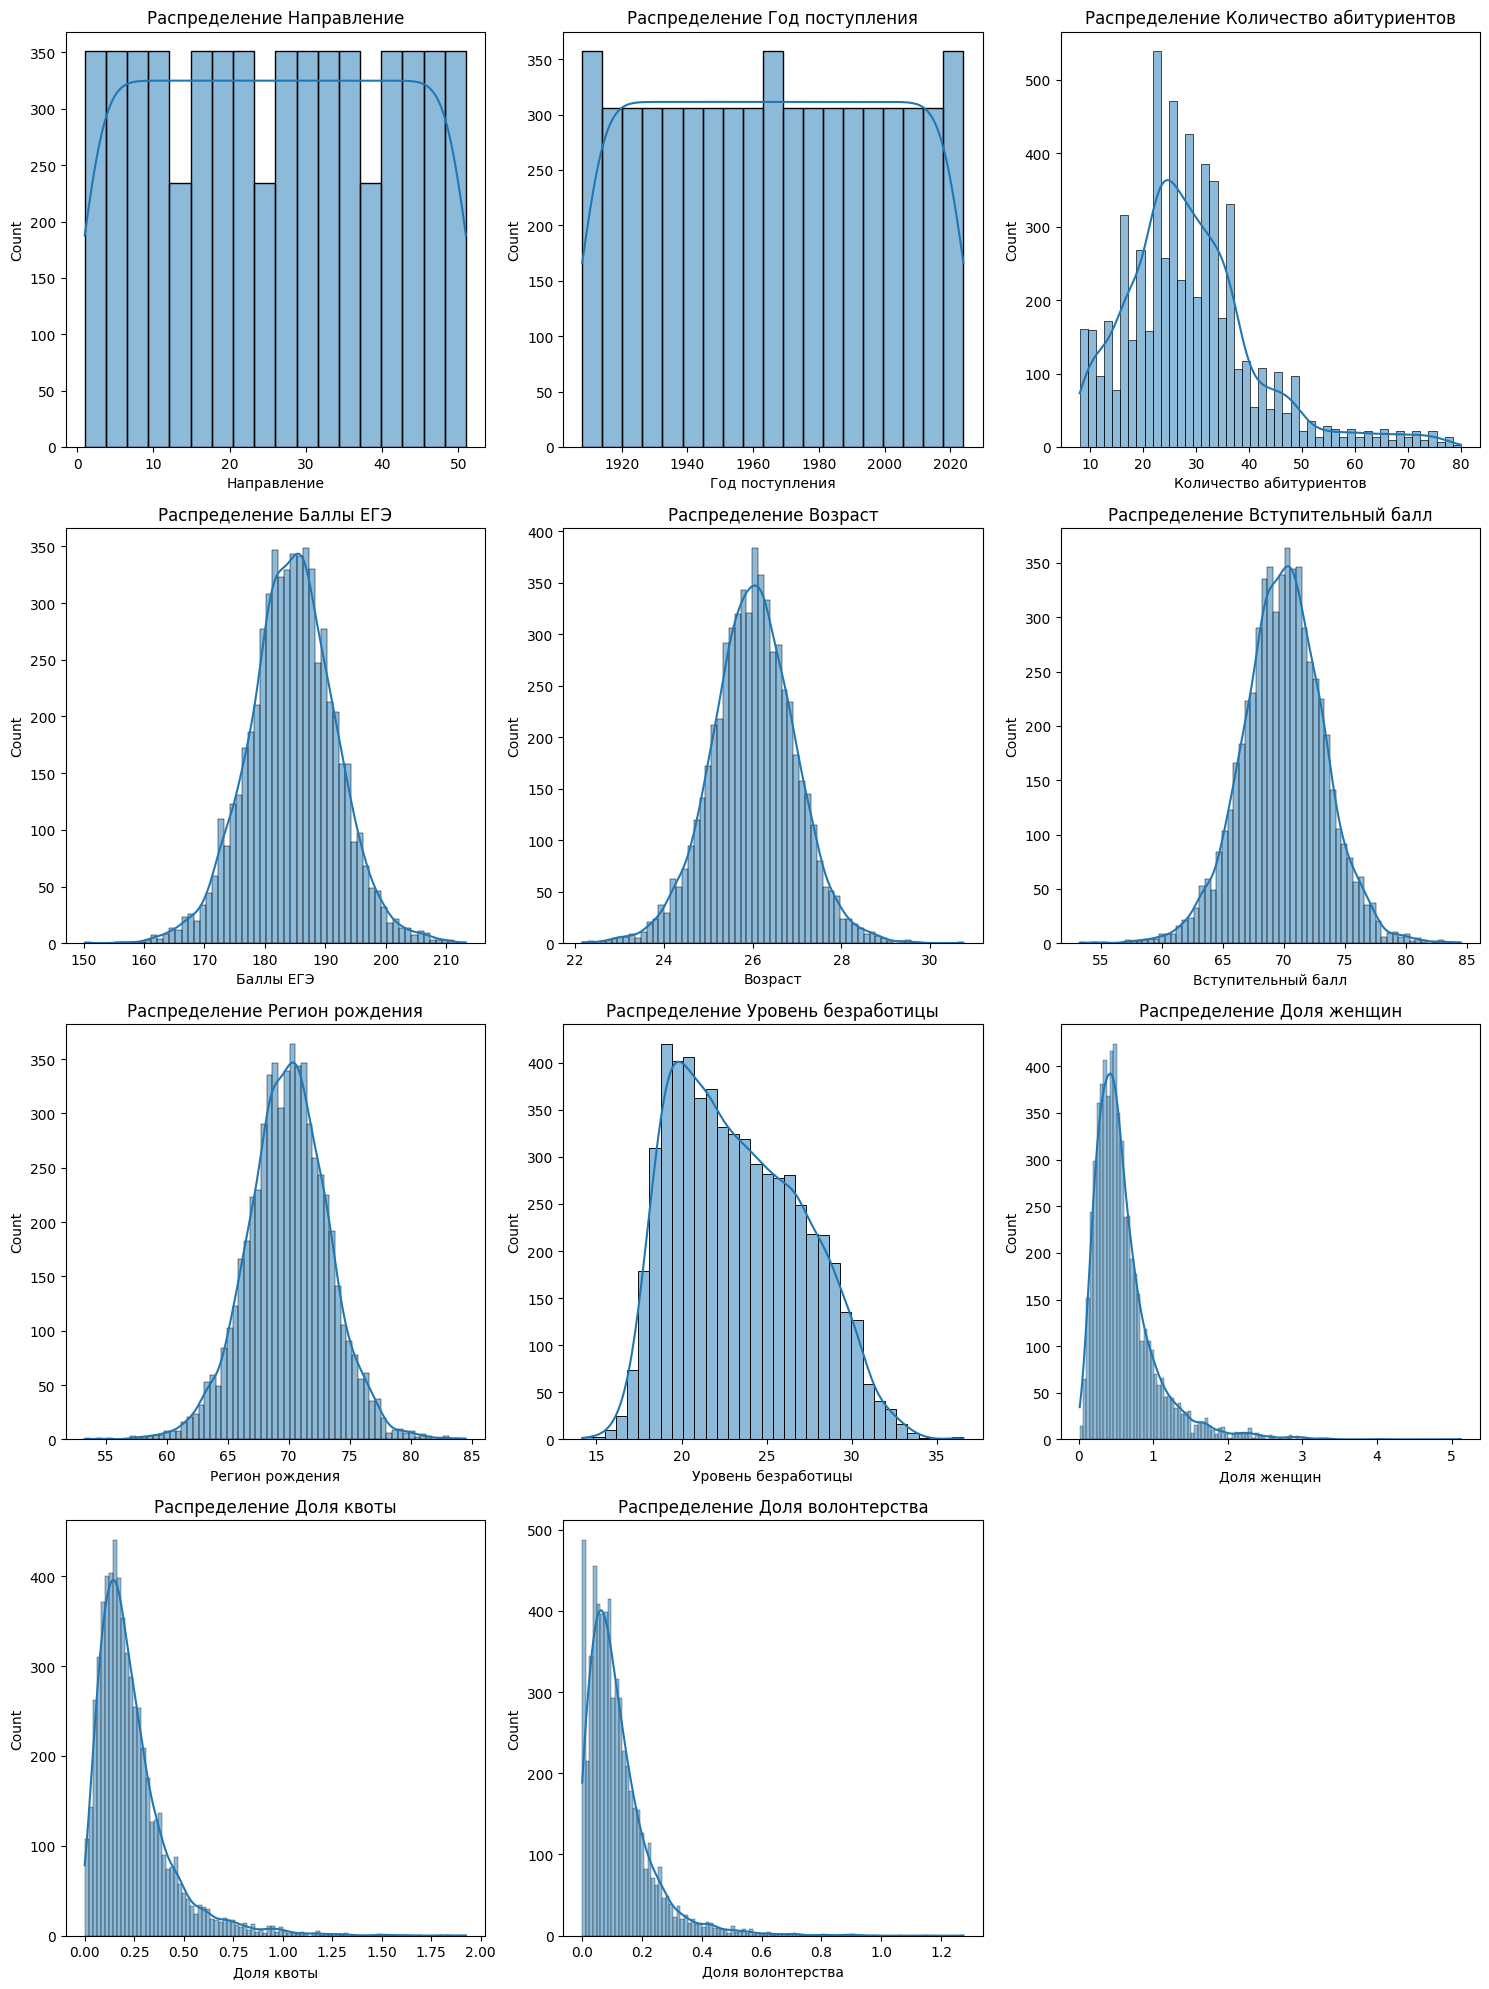

In [260]:
# Определение числовых колонок
numeric_columns = final_df.select_dtypes(include=[np.number]).columns.tolist()

# Определение количества строк и столбцов для подграфиков
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + 1 if num_plots % num_cols != 0 else num_plots // num_cols

# Построение графиков
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(final_df[column], kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

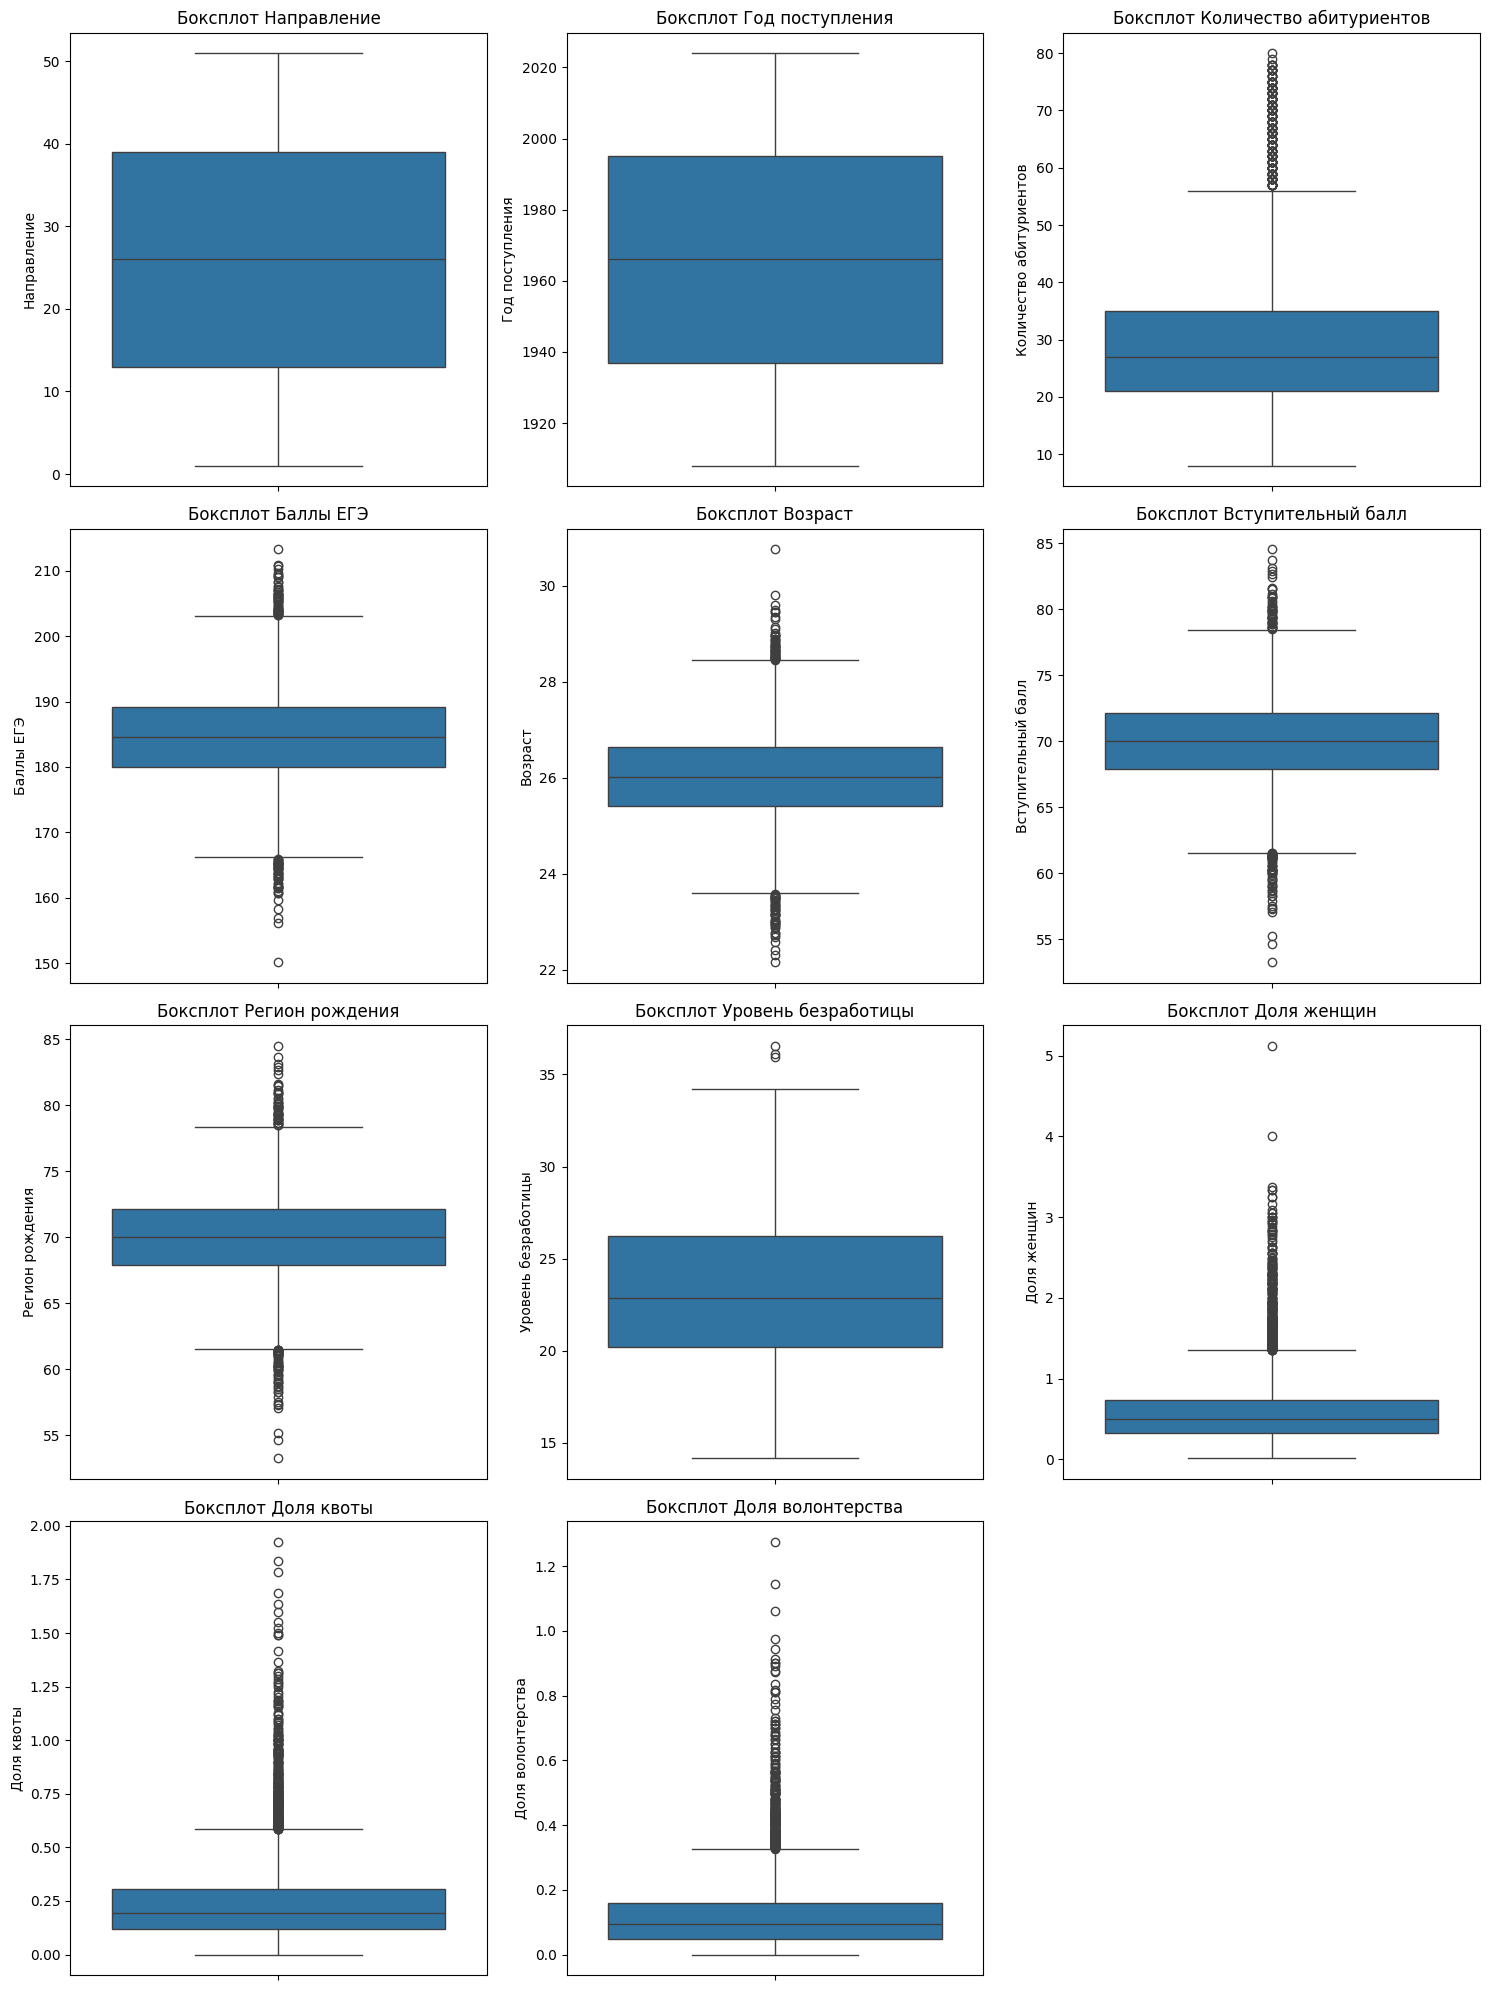

In [261]:
# Боксплоты для выявления выбросов
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=final_df[column])
    plt.title(f'Боксплот {column}')
plt.tight_layout()
plt.show()

In [262]:
from sklearn.preprocessing import RobustScaler

numerical_features = ['Баллы ЕГЭ', 'Вступительный балл', 'Возраст',
                       'Регион рождения', 'Доля женщин', 'Доля квоты', 'Доля волонтерства']

# Исходные данные
print("До масштабирования:")
print(final_df[numerical_features].describe())

scaler = RobustScaler()
scaler_df = final_df.copy()
scaler_df[numerical_features] = scaler.fit_transform(final_df[numerical_features])

# После масштабирования
print("\nПосле масштабирования:")
print(scaler_df[numerical_features].describe())

До масштабирования:
         Баллы ЕГЭ  Вступительный балл      Возраст  Регион рождения  \
count  5967.000000         5967.000000  5967.000000      5967.000000   
mean    184.534062           69.952942    26.014957        69.952942   
std       7.262006            3.367897     0.950701         3.367897   
min     150.187471           53.258320    22.157270        53.258320   
25%     180.010558           67.875086    25.414383        67.875086   
50%     184.621191           69.987785    26.003927        69.987785   
75%     189.232102           72.121942    26.627782        72.121942   
max     213.250000           84.518523    30.751854        84.518523   

       Доля женщин   Доля квоты  Доля волонтерства  
count  5967.000000  5967.000000        5967.000000  
mean      0.603474     0.242196           0.121166  
std       0.433658     0.194708           0.111845  
min       0.013328     0.000000           0.000000  
25%       0.326915     0.117269           0.048309  
50%       0.4

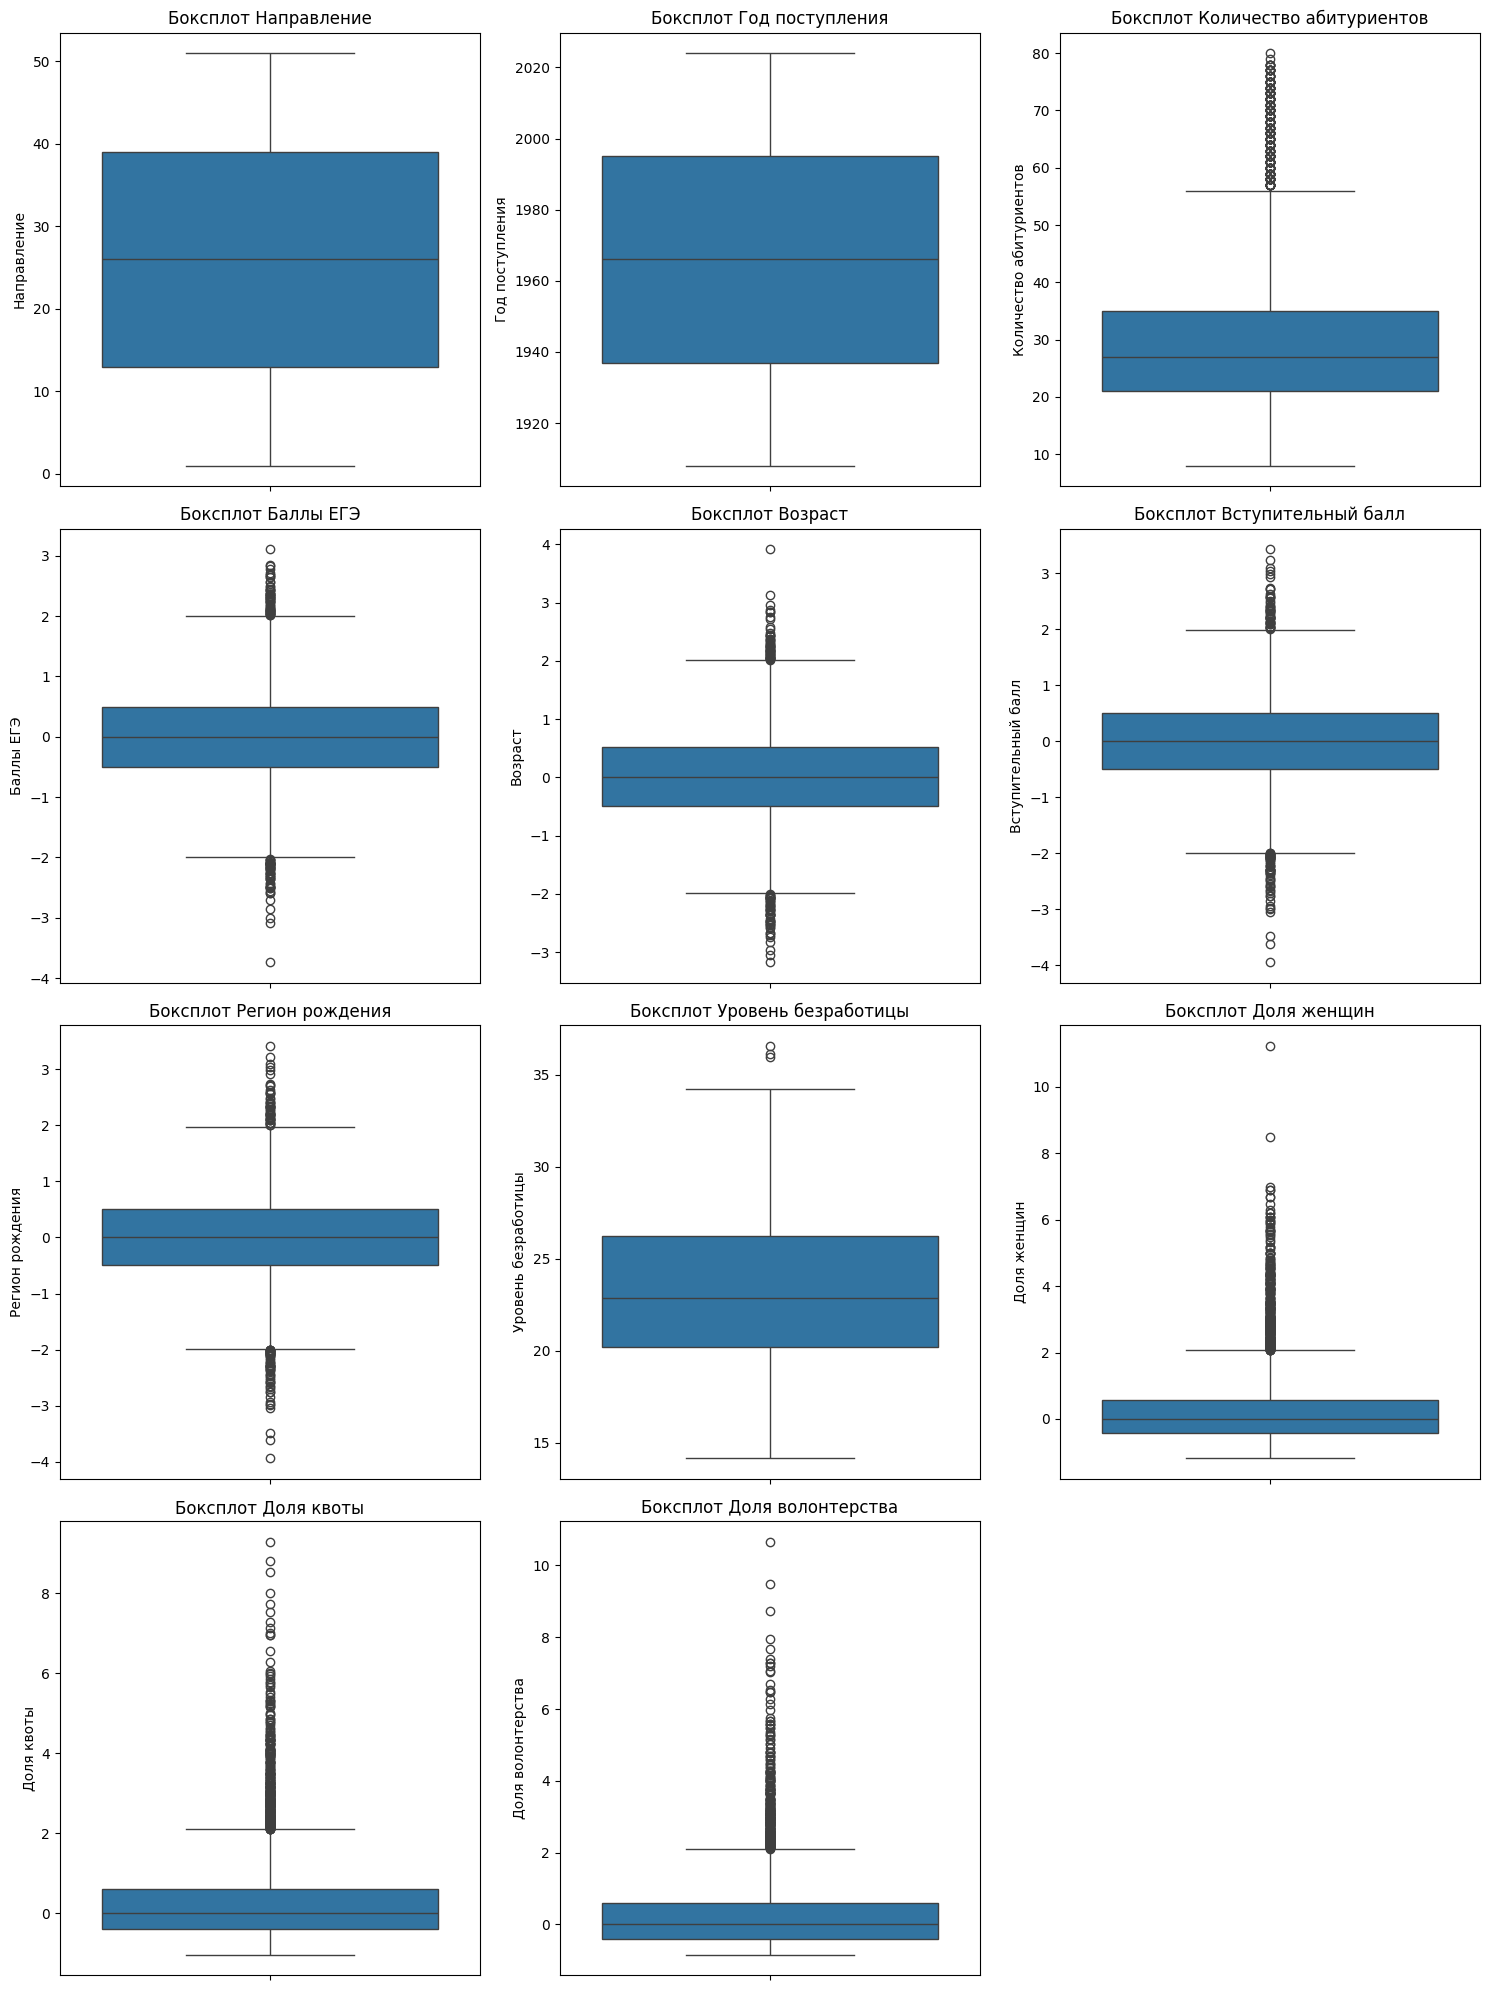

In [263]:
# Боксплоты для выявления выбросов
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=scaler_df[column])
    plt.title(f'Боксплот {column}')
plt.tight_layout()
plt.show()

In [264]:
# Проверка распределения целевого признака
target_column = 'Количество абитуриентов' 
print(scaler_df[target_column].value_counts(normalize=True))


Количество абитуриентов
22    0.046422
23    0.043908
24    0.043070
25    0.040724
26    0.038378
        ...   
71    0.001341
76    0.001006
78    0.000838
79    0.000168
80    0.000168
Name: proportion, Length: 73, dtype: float64


In [265]:
output_file_path = 'final2.csv'
scaler_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')